# **Logbook es. 11 - Preavanzata**
## **Oscillatore di Duffing**

### **Homework 1**

### **Homework 2**
**Obiettivi**:
1) Verificare, anche sulla base degli articoli forniti, le considerazioni facendo attenzione alla notazione non sempre coincidente;
2) Verificare se i componenti nello schema circuitale soddisfano le approssimazioni alla base del modello del circuito e calcolare il profilo di forza $F(V_C)$;
3) Simulare la rete di $R_3$ e diodi con Tina per ottenere una curva più realistica di $F(V_C)$;
4) Usare questi risultati per trovare il valore di $V_C$ atteso per i due punti di equilibrio del circuito. 

**1 -** 

Dall'analisi dello schema circuitale (Figura 2.3), si identificano le variabili dinamiche principali:
* **$V_C$**: Tensione sul condensatore (corrispondente alla posizione $x$ nel sistema meccanico).
* **$i_L$**: Corrente nell'induttore (corrispondente alla velocità $\dot{x}$).

Al nodo di uscita (destra), la corrente si ripartisce tra il condensatore, l'induttore e il ramo di feedback $R_3$. Come indicato nell'equazione (2.3):
$$C \frac{dV_C}{dt} = i_L + i_3 \approx i_L$$
L'approssimazione $i_3 \approx 0$ è valida se l'impedenza del ramo $R_3$ è molto maggiore dell'impedenza caratteristica dell'oscillatore alla frequenza di lavoro $\omega_0 = 1/\sqrt{LC}$. In particolare, deve valere $R_3 \gg \sqrt{L/C}$.

L'uscita dell'OpAmp $V_{out}$ governa la serie $R-L-C$. L'equazione (2.5) descrive la dinamica:
$$V_{out} = L \frac{di_L}{dt} + R i_L + V_C$$

L'OpAmp (OP1) agisce come un sommatore. Considerando l'ingresso invertente collegato a $V_{W1}$ tramite $R_1$ e l'ingresso non-invertente $V_+$, l'uscita è data da:
$$V_{out} = \frac{R_1 + R_2}{R_1} V_+ - \frac{R_2}{R_1} V_{W1}$$
Assumendo, come nello schema, $R_1 = R_2 = 10\,k\Omega$, si ottiene l'equazione (2.4):
$$V_{out} = 2V_+ - V_{W1}$$

La non-linearità è introdotta dalla rete composta da $R_3$ e dai diodi $D_1, D_2$. Il potenziale $V_+$ al terminale non-invertente dipende da $V_C$ e dalla caduta di tensione sui diodi.

Sia $V^*$ la tensione di soglia dei diodi (circa $0.6-0.7\,V$ per i 1N4007):
* **Sotto soglia**: Se $|V_C| < V^*$, i diodi non conducono, $i_3 \approx 0$ e $V_+ \approx V_C$.
* **Saturazione**: Se $|V_C| > V^*$, uno dei diodi entra in conduzione, portando $V_+ \approx \pm V^*$.

Sostituendo $V_{out}$ nell'equazione della maglia e isolando il termine derivativo, otteniamo l'equazione (2.6):
$$L \frac{di_L}{dt} = (2V_+ - V_C) - R i_L - V_{W1}$$
Definiamo la forza di richiamo $F(V_C) = 2V_+ - V_C$. Sulla base del comportamento dei diodi, la funzione risulta (2.7):
$$F(V_C) = \begin{cases} -2V^* - V_C & \text{se } V_C < -V^* \\ V_C & \text{se } -V^* \le V_C \le +V^* \\ +2V^* - V_C & \text{se } V_C > +V^* \end{cases}$$


Questa funzione $F(V_C)$ modella il potenziale a **doppia buca** tipico di Duffing:
1. **Punto di equilibrio instabile**: $V_C = 0$ (dove la pendenza di $F(V_C)$ è positiva).
2. **Punti di equilibrio stabili**: $V_C = \pm 2V^*$. In questi punti $F(V_C) = 0$ e la derivata $F'(V_C)$ è negativa, garantendo la stabilità locale.

L'analisi è coerente con l'articolo di riferimento. L'approssimazione $i_3 \ll i_L$ è fondamentale per separare la dinamica del filtro RLC dalla rete di feedback. L'uso di un **OP07** è raccomandato per minimizzare l'offset di tensione, garantendo la simmetria dei punti di equilibrio.

**2 -** 

Dallo schema si estraggono i seguenti valori:
* $L = 4.7 \, \text{mH}$
* $C = 100 \, \text{nF}$
* $R = 100 \, \Omega$ (Resistenza di smorzamento)
* $R_3 = 10 \, \text{k}\Omega$ (Resistenza di accoppiamento non lineare)
* $V^* \approx 0.6 \, \text{V}$ (Tensione di soglia stimata per i diodi 1N4007)

L'analisi teorica (Eq. 2.3) assume che la corrente nel ramo di feedback sia trascurabile. Questo è vero se l'impedenza del ramo $R_3$ è molto superiore all'impedenza caratteristica dell' $LC$ alla frequenza di lavoro. Infatti, per osservare i fenomeni non lineari (come il salto tra i due pozzi di potenziale), abbiamo bisogno che la tensione $V_C$ raggiunga ampiezze elevate e il modo più efficiente per ottenere ampie oscillazioni con una piccola forzante esterna ($V_{W1}$) è far oscillare il sistema alla sua frequenza naturale.

**Frequenza di risonanza ($\omega_0$):**
$$\omega_0 = \frac{1}{\sqrt{LC}} = \frac{1}{\sqrt{4.7 \times 10^{-3} \cdot 100 \times 10^{-9}}} \approx 46127 \, \text{rad/s} \quad (\approx 7.34 \, \text{kHz})$$

**Impedenza caratteristica ($\rho$):**
$$\rho = \omega_0 L = \sqrt{\frac{L}{C}} = \sqrt{\frac{4.7 \times 10^{-3}}{100 \times 10^{-9}}} \approx 216.8 \, \Omega$$

Affinché il modello sia accurato, deve valere $R_3 \gg \rho$. Nel nostro caso:
$$\frac{R_3}{\rho} = \frac{10000}{216.8} \approx 46$$
Il rapporto di **46:1** conferma che l'approssimazione è **ampiamente soddisfatta**. La dinamica del sistema sarà dominata dal risonatore $LC$ e non dal carico del feedback.

La funzione di forza $F(V_C) = 2V_+ - V_C$ determina la forma del potenziale. Utilizzando $V^* = 0.6 \, \text{V}$, otteniamo il seguente profilo:

$$F(V_C) = \begin{cases} -1.2 - V_C & \text{se } V_C < -0.6 \, \text{V} \\ V_C & \text{se } -0.6 \le V_C \le 0.6 \, \text{V} \\ 1.2 - V_C & \text{se } V_C > 0.6 \, \text{V} \end{cases}$$

I punti di equilibrio si trovano risolvendo $F(V_C) = 0$:
1.  **$V_{C1} = 0 \, \text{V}$**: Equilibrio **instabile** (la "cresta" del potenziale).
2.  **$V_{C2,3} = \pm 1.2 \, \text{V}$**: Equilibri **stabili** (i due pozzi di potenziale).

* **Stabilità**: Il circuito implementa correttamente un sistema bistabile con minimi di potenziale a $\pm 1.2 \, \text{V}$.
* **Smorzamento**: Con $R = 100 \, \Omega$, il fattore di merito è $Q = \frac{\rho}{R} \approx 2.17$. Il sistema è debolmente smorzato, condizione ideale per l'insorgenza di regimi caotici quando sottoposto a forzante $V_{W1}$.
* **Soglia Diodi**: La scelta dei 1N4007 è appropriata per segnali nell'ordine dei Volt, garantendo una regione di linearità centrale ben definita.

**3-** 

Utilizzando la simulazione DC Sweep su Tina della rete di feedback ($R_3 = 10k\Omega$ e diodi 1N4007), abbiamo ottenuto la caratteristica reale $V_+(V_C)$.

<img src="homework2_circuitoTINA.png" alt="Circuito in Tina" width="600">

*Figura 1: schema circuitale della simulazione del ramo di feedback in Tina.*

<img src="homework2_TINA.png" alt="Simulazione in Tina" width="600">

*Figura 2: curva di trasferimento $V_+(V_C)$ ottenuta da Tina.*


**4-**

* La curva mostra la transizione morbida dei diodi reali, con una saturazione che inizia intorno ai $0.5\text{ V} - 0.6\text{ V}$.
* I punti di equilibrio stabili del circuito di Duffing sono definiti dalla condizione $F(V_C) = 0$, che equivale a cercare l'intersezione tra la curva di trasferimento simulata e la retta $V_+ = \frac{1}{2} V_C$.

Per trovare i punti di equilibrio, risolviamo numericamente l'equazione:
$$2V_+(V_C) - V_C = 0 \quad \Rightarrow \quad V_+(V_C) = \frac{1}{2} V_C$$
Dalla curva di Tina, stimiamo i punti di intersezione:
* **$V_{C1} \approx 0 \, \text{V}$**: Equilibrio instabile (vicino alla regione lineare).
* **$V_{C2} \approx +0.94 \, \text{V}$**: Equilibrio stabile (saturazione positiva).
* **$V_{C3} \approx -0.94 \, \text{V}$**: Equilibrio stabile (saturazione negativa).

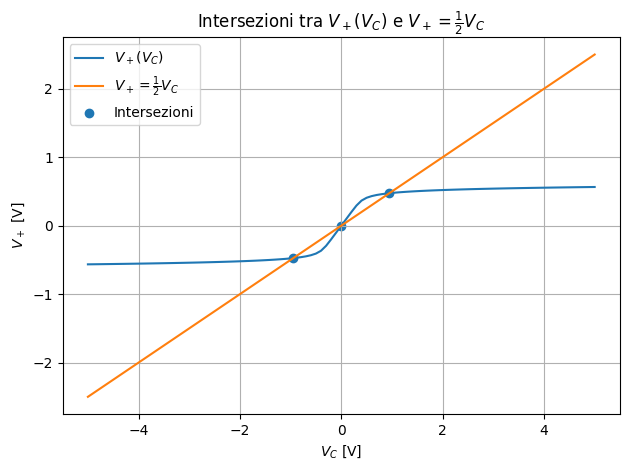

Intersezioni trovate (V_C, V_+):
  V_C = -0.94778760 V,  V_+ = -0.47389380 V
  V_C = 0.00000000 V,  V_+ = 0.00000000 V
  V_C = 0.94778761 V,  V_+ = 0.47389380 V


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1) Caricamento dati
# =========================
# Cambia questo path se necessario:
filename = "dati_TINA.txt"

# genfromtxt gestisce bene header e separatori vari
data = np.genfromtxt(filename, comments="#", skip_header=1)

# Se il file avesse righe vuote, filtriamole
data = data[~np.isnan(data).any(axis=1)]

V_C = data[:, 0]
V_plus = data[:, 1]

# (opzionale ma consigliato) assicuriamoci che siano ordinati per V_C crescente
idx = np.argsort(V_C)
V_C = V_C[idx]
V_plus = V_plus[idx]

# =========================
# 2) Intersezioni: V_plus = 0.5 * V_C
# =========================
f = V_plus - 0.5 * V_C

x_int = []
y_int = []

for i in range(len(V_C) - 1):
    # Caso in cui un punto sia esattamente sulla retta (raro con float)
    if f[i] == 0.0:
        x_int.append(V_C[i])
        y_int.append(V_plus[i])
        continue

    # Cambio di segno => esiste uno zero nell'intervallo
    if f[i] * f[i + 1] < 0:
        x1, x2 = V_C[i], V_C[i + 1]
        y1, y2 = f[i], f[i + 1]

        # Interpolazione lineare dello zero di f tra (x1,y1) e (x2,y2)
        x0 = x1 - y1 * (x2 - x1) / (y2 - y1)
        x_int.append(x0)
        y_int.append(0.5 * x0)  # perché sul vincolo V_plus = 0.5*V_C

x_int = np.array(x_int)
y_int = np.array(y_int)

# =========================
# 3) Plot
# =========================
plt.figure()
plt.plot(V_C, V_plus, label=r"$V_+(V_C)$")
plt.plot(V_C, 0.5 * V_C, label=r"$V_+ = \frac{1}{2}V_C$")

if len(x_int) > 0:
    plt.scatter(x_int, y_int, label="Intersezioni")
    
plt.xlabel(r"$V_C$ [V]")
plt.ylabel(r"$V_+$ [V]")
plt.title(r"Intersezioni tra $V_+(V_C)$ e $V_+ = \frac{1}{2}V_C$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# =========================
# 4) Stampa risultati
# =========================
print("Intersezioni trovate (V_C, V_+):")
if len(x_int) == 0:
    print("  Nessuna intersezione trovata nel range dei dati.")
else:
    for xi, yi in zip(x_int, y_int):
        print(f"  V_C = {xi:.8f} V,  V_+ = {yi:.8f} V")

Questo valore è leggermente inferiore ai $1.2 \, \text{V}$ previsti dal modello ideale a causa della caduta di tensione non nulla sui diodi anche prima della piena conduzione e della pendenza nella zona di saturazione.

## **Task 1**
**Obiettivi**:
- Montare il circuito;
- Dimostrare che perturbando momentaneamente $V_{W1}$ è possibile indurre una transizione fra le due configurazioni di equilibrio stabili;
- Stimare i due $V_C$ di equilibrio.

<img src="circuito.jpg" alt="Circuito da montare" width="600">  

*Figura 3: montaggio del circuito*

Tramite il seguente codice, abbiamo acquisito i dati di $V_C$ e $V_{W1}$ durante una perturbazione che induce la transizione tra i due stati stabili:


In [ ]:
import tdwf
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
import numpy as np

path = "/home/marco/Desktop/Uni_anno3/TD/Es_02"

# -[Configurazione Analog Discovery 2]-----------------------------------------
#   1. Connessiene con AD2
ad2 = tdwf.AD2()

# notare in particolare la configurazione del generatore di funzioni e dell'oscilloscopio

#   2. Configurazione generatore di funzioni
wgen = tdwf.WaveGen(ad2.hdwf)
wgen.w1.ampl = 1
wgen.w1.freq = 1e2
wgen.w1.offs = 0.0
wgen.w1.func = tdwf.funcSine
wgen.w1.duty = 50
wgen.w1.start()
#   3. Configurazione oscilloscopio
scope = tdwf.Scope(ad2.hdwf)
scope.fs=1e4
scope.npt=1000
scope.ch1.rng = 5
scope.ch2.rng = 50
scope.ch1.avg=False
scope.ch2.avg=True
scope.trig(True, level = 0.5, hist = 0.4, sour = tdwf.trigsrcCh1)
#   4. Configurazione powersupply
ad2.vdd = 3
ad2.vss = -3
ad2.power(True)

# -[Funzioni di gestione eventi]-----------------------------------------------
def on_close(event):
    global flag_run
    flag_run = False
def on_key(event):
    global flag_run
    global flag_acq
    if event.key == 'x':  # => export su file
        filename = input("Esporta dati su file: ")
        data = np.column_stack((scope.time.vals, scope.ch1.vals, scope.ch2.vals))
        if scope.npt > 8192:
            info =  f"Acquisizione Analog Discovery 2 - Lunga durata\ntime\tch1\tch2"
        else:
            info =  f"Acquisizione Analog Discovery 2\nTimestamp {scope.time.t0}\ntime\tch1\tch2"
        np.savetxt(filename, data, delimiter='\t', header=info)
    if event.key == ' ':  # => run/pausa misura
        flag_acq = not flag_acq
    if event.key == 'escape':  # => esci dalla misura
        flag_run = False

# -[Ciclo di misura]-----------------------------------------------------------
fig, ax = plt.subplots(figsize=(12,6))
fig.canvas.mpl_connect("close_event", on_close)
fig.canvas.mpl_connect('key_press_event', on_key)
flag_run = True
flag_acq = True
flag_first = True
while flag_run:
    if flag_acq: # l'acquisizione è attiva?
        scope.sample()
    # Visualizzazione
    if flag_first:
        flag_first = False
        hp1, = plt.plot(scope.time.vals, scope.ch1.vals, "-", label="Ch1", color="tab:orange")
        hp2, = plt.plot(scope.time.vals, scope.ch2.vals, "-", label="Ch2", color="tab:blue")
        plt.legend()
        plt.grid(True)
        plt.xlabel("Time [msec]", fontsize=15)
        plt.ylabel("Signal [V]", fontsize=15)
        plt.title("User interaction: x|space|escape")
        plt.tight_layout()
        plt.show(block = False)
    else:
        hp1.set_ydata(scope.ch1.vals)
        hp2.set_ydata(scope.ch2.vals)
        fig.canvas.draw()
        fig.canvas.flush_events()

plt.close(fig)
ad2.close()

<img src="task1_transizione.png" alt="Acquisizione dati" width="600">

*Figura 4: acquisizione dati durante la transizione tra i due stati stabili.*

In questa acquisizione, abbiamo applicato una forzante che transisce periodicamente tra due valori costanti con l'ausilio di un'onda quadra, che fa oscillare il sistema tra le due buche di potenziale. La curva mostra chiaramente la transizione tra le due buche. I valori tra i quali $V_C$ oscilla non coincidono perfettamente con i punti di equilibrio stabili (minimi del potenziale) in quanto, in tali punti, la forzante ($V_{W1}$) non è nulla.

Utilizzando, in un secondo momento, una forzante quadra con valore nullo in alto o basso (quindi aggiungendo un offset pari all'ampiezza della forma d'onda rispettivamente negativo o positivo), abbiamo potuto osservare il sistema stabilizzarsi nei due minimi, permettendoci, quindi, di stimare i valori di $V_C$ corrispondenti a questi punti.

<img src="task1_min_neg.png" alt="Acquisizione dati" width="600">

*Figura 5: acquisizione dati con $V_{W1}$ a valore positivo, che stabilizza il sistema nel pozzo di potenziale negativo.*

<img src="task1_min_pos.png" alt="Acquisizione dati" width="600">

*Figura 6: acquisizione dati con $V_{W1}$ a valore negativo, che stabilizza il sistema nel pozzo di potenziale positivo.*

Abbiamo inoltre utilizzato $\texttt{sweepbias.ipynb}$ per acquisire la curva $V_C$ in funzione di $V_{W1}$:

<img src="task1_risposta_sistema_min_neg.png" alt="risposta sistema attorno minimo negativo" width="600">

*Figura 7: acquisizione dati di $V_C$ in funzione di $V_{W1}$ partendo da valori di $V_{W1}$ positivi.*

<img src="task1_risposta_sistema_min_pos.png" alt="risposta sistema attorno minimo positivo" width="600">

*Figura 8: acquisizione dati di $V_C$ in funzione di $V_{W1}$ partendo da valori di $V_{W1}$ negativi.*

Le immagini mostrano la risposta invertente del circuito, in quanto per forzanti positive $V_C$ assume valori negativi; inoltre si può anche notare un salto dovuto alla presenza dei diodi, che in tale range di potenziale sono entrambi reverse biased, quindi non fanno scaricare a terra il potenziale a valle di $R_3$.
Notare come la risposta del sistema cambi a seconda che la forzante parta da un valore positivo o negativo, suggerendo la presenza di un'isteresi nel circuito: quando W1 parte da valori positivi il circuito si trova nel minimo del potenziale negativo e si sposta verso l'altro con un tratto lineare prima del salto più lungo rispetto a quello successivo al salto, viceversa quanfo W1 parte da valori positivi.

Tale comportamento verrà ulteriormente indagato nel task 3.


## **Task 2**

- Effettuare, per ognuno dei due minimi, una misura della risposta in frequenza del circuito generando due plot di Bode, usando una eccitazione di ampiezza adeguata;
- Usare la classica funzione di riposta di un oscillatore armonico smorzato per fittare i parametri $\omega_0$ e $\gamma$ del sistema;
- Verificare la consistenza con i parametri circuitali utilizzati per il risuonatore RLC.

FAI I FIT (IL CODICE è SWEEPFREQ_1.PY)

## **Task 3**

- Mandare a $V_{W1}$ un’onda triangolare con una frequenza angolare che soddisfi ωτ << 1, in modo che
causi una variazione lenta del punto di equilibrio del circuito secondo l’equazione $F(V_C) - V_{W1} = 0$;
- Ricostruire la curva $F(V_C)$

L'idea della condizione ωτ << 1 sta nel fatto che ho bisogno che la forzante agisca in maniera molto più lenta rispetto al tempo necessario al sistema per stabilizzarsi ($\tau = L/R \simeq 4.7 \cdot 10^{-5}$ s), così, istante per istante, il sistema risulterà in equilibrio e potrò via via "sposstarlo" lungo il profilo del potenziale, idealmente riuscendo ad esplorarlo completamente (esattamente come tirare o spingere una massa attaccata ad una molla: se lo faccio lentamente, posso considerarla istante per istante all'equilibrio e se applico la forza attraverso un dinamometro posso misurare via via il valore che questo restituisce, se punto per punto la forza che esercito sulla massa attraverso il dinamometro è uguale e contraria alla forza di richiamo della molla sono quindi in grado di ricostruire quest'ultima attraverso le letture del dinamometro), il suo integrale restituirà il potenziale del sistema.

Operativamente si è inizialmente scelto di implementare questo metodo per mezzo di un'onda triangolare \textbf{molto lenta} rispetto al tempo di stabilizzazione $\tau$ del sistema, misurando il valore di VW1 (lettura del dinamometro) in funzione di VC (posizione della massa) si recupera il profilo della forza di richiamo.

L'idea dell'onda triangolare sta nel fatto che prima faccio salire lentamente VW1 (diciamo tiro la molla) e poi lo faccio lentamente scendere (spingo la molla) seguendo concettualmente la procedura sopra descritta.

Operativamente abbiamo scelto una frequenza della forzante pari a $\omega = 1 kHz << R/L \simeq 2 \cdot 10^4 Hz$ ed un'ampiezza di 2 V (più è grande l'ampiezza della forzante meglio si riesce ad esplorare il potenziale: con il valore scelto si è in grado di vedere sia la barriera che entrambe i minimi).

Notare come teoricamente ci si attende tale profilo essere formato da tre tratti lineari che dovrebbero ricordare una cubica, come riportato nella seguente immagine:

<img src="forzante_standard.png" alt="forzante attesa teoricamente" width="600">

Quindi dalla indagine ci si aspetta tale profilo, del resto però il lavoro fatto nel task 1 coincide a quanto fatto qui, in quanto anche lì si è cambiata gradualmente e lentamente la forzante dando tempo al circuito di stabilizzarsi prima di cambiarla nuovamente, solo che nel task 1 si è usata una forzante costante con un valore che cabiava gradualmente a differenza di una triangolare lenta.

In più nel task1 si è fatta prima salire e poi scendere la forzante separatamente, questo ha evidenziato dei risultati diversi a seconda del segno del valore iniziale della forzante (o meglio dello stato iniziale del circuito), questo suggerisce un comportamenti isteretico, cosa accade, quindi se opero esattamente come nel task 1 facendo prima salire e poi scendere la forzante? Mi aspetto un ciclo isteretico, ma allo stesso tempo devo ottenere il profilo quasi-cubico riportato sopra.

Ecco il risultato ottenuto lasciando il range di variabilità da -5 V a +5 V (notare che non si vede un'onda triangolare poichè quello riportato non è un plot in funzione del tempo, ma bensì in funzione del voltaggio della forzante, quindi prima arriva a +5 V e poi torna a -5 V passando per la stessa linea, stesso comportamento è ritrovato nella risposta del circuito, quindi nella forzante):

<img src="profilo_forzante_1.png" alt="forzante misurata" width="600">

I tratti verticali sono attribuiti alla saturazione dell'OpAmp, invece il profilo misurata ricorda perfettamente quello atteso teoricamente, eccenzion fatta per il tratto lineare mancante dove è presente il salto: a causa dei diodi, evidentemente, risulta difficile riuscire ad esplorare la barriere di potenziale tra le due buche in cui, probabilmente il sistema è troppo instabile e transisce troppo rapidamente.

Notare poi come non sia presente nessun ciclo di isteresi, il comportamento precedentemente riscontrato suggerisce quindi che la presunta isteresi sia in realtà dovuta non ad un comportamento non lineare del cirucito, ma bensì alla modalità operativa stessa: il potenziale attraversando il salto o sale o scende, per seguire l'andamento della forzante in una sola spazzata dovrebbe cambiare trend proprio a ridosso della spazzata, cosa che non riesce a fare, questo si traduce si una diversa lunghezza dei tratti lineari a seconda del punto di partenza della forzanze. Il problema è operativo non fisico quindi, tant'è che viene risolto invertendo il senso in cui il cui il potenziale varia.

Invece per quanto riguarda l'indagine con l'onda triangolare otteniamo un risultato completamente diverso (l'immagine che segue è stata ottenuta osservando un singolo periodo dell'onda triangolare):

<img src="task3_ricostruzione_forzante_standard.png" alt="forzante moisurata con ciclo di isteresi" width="600">

*Nell'immagine si è settata un'ampiezza di 2V, un offset nullo ed una frequenza di 1 kHz, si è poi campionato un singolo periodo della forzante, in modo da far sì che il circuito percorresse il ciclo di isteresi una sola volta.*

Qui si vede chiaramente un ciclo di isteresi, ma non si riesce a fornire un'interpretazione fisica sensata di quanto osservato. Si potrebbe assumere che i tratti inclinati del ciclo a sinistra e a destra dell'origine possano essere associati ai corrispettivi tratti della forzante e che per gli stessi motivi di instabilità dovuta ai diodi non si riesca ad risolvere il tratto con slope opposta che dovrebbe collegarli, quindi, in tutta risposta il circuito segue un ciclo di isteresi.

Però dire che il circuito segue un ciclo di isteresi significa anche dire che il circuito transisce tra un minimo e l'altro seguendo tale ciclo, ma questo sembrerebbe essere assurdo poichè il circuito è fisicamente obbligato ad attraversare la barriera di potenziale tra le due buche per passare dall'una all'altra, se invece lo fa passando per il ciclo di isteresi che sta realmente facendo il circuito? Come cambia la sua configurazione muovendosi lungo tale ciclo? Attraversa davvero la barriera di potenziale e noi lo vediamo come un ciclo di isteresi per colpa del nostro metodo di indagine, oppure tale metodo restituisce questo risultato perchè in realtà non sta perturbando il circuito come avevamo pensato?

In effeti stiamo lavorando nell'assunzione che la forzante vari molto più lentamente di quanto serve al circuito per stabilizzarsi, ma è veramente così? sicuramente il periodo della forzante è molto minore del tempo di assestamento del circuito, ma la sua derivata temporale è davvero minore di tale tempo? Nel primo metodo di indagine presentato abbiamo controllato punto per punto la forzante in modo che il tempo che impiegasse a variare il suo valore fosse effettivamente abbastanza lento, ma nel secondo metodo è il suo periodo che è abbastanza lento, chi ci dice che sia così anche per il modo in cui varia il suo valore locamente nel tempo?

Notiamo infine un'altro paio di comportamenti particolare del circuito una volta sottoposto a questa "forzante periodica lentamente variabile":

1. Il cilco non è stabile: se lo si fa percorrere più volte al circuito questo si sposta, non rimane nello stesso posto, seppur di poco, quindi questo potrebbe essere semplicemente dovuto al rumore per esempio, che una volta amplificato dall'OpAmp può rendere il tutto un po' più instabile di quanto ci si aspetterebbe.

2. Abbassando la frequenza della fornzante la forma del ciclo cambia:

<img src="task3_ricostruzione_forzante_bassa_frequenza_standard.png" alt="forzante moisurata con ciclo di isteresi a bassa freq" width="600">

*Stessi parametri della prima immagine ma frequenza abbassata a 100 Hz.*

3. Anche aumentando l'ampiezza il ciclo cambia:

<img src="task3_ricostruzione_forzante_alta_ampiezza_standard.png" alt="forzante moisurata con ciclo di isteresi a bassa freq" width="600">

Perchè cambiando questi parametri la fomra del ciclo cambia così radicalmente? Come spiegare i lunghi tratti lineari nel ciclo a bassa frequenza e perchè in questo caso il ciclo sembra stringersi attorno all'orgine? Come si comporta il circuito nei curls ai margini del ciclo? Perchè con questa indidagine non si riesce a ricostruire il profilo della forzante?

Per ora rispondere a queste domande risulta essere complicato, bisognerebbe studiare nel dettaglio la risposta del circuito una volta sottoposto a tale stimolo per capire che cosa accade realmente.

In [ ]:
#INSERIRE task3_ricostruzione_forzante.py

INSERIRE IMMAGINE CICLO DI ISTERESI E INSERIRE RETTA IDEALE
INSERIRE IMMAGINE ZOOM CICLO DI ISTERESI PER MOSTRARE LE DIFFERENZE TRA I VARI PERIODI

I punti di equilibrio soddisfano:

$F(V_C) - V_{W1} = 0$

cioè:

$V_{W1} = F(V_C)$

Quindi, se il circuito riuscisse a rimanere sempre in equilibrio statico mentre $V_{W1}$ varia lentamente, allora il grafico $V_{W1}$ vs $V_C$ ricostruirebbe direttamente la curva $F(V_C)$ (una retta).

Tuttavia, nel regime bistabile, la relazione $V_{W1}=F(V_C)$ può avere più soluzioni per lo stesso $V_{W1}$: tipicamente la curva $F(V_C)$ ha una forma “a S”, con:

- **due rami esterni stabili** (associati ai due minimi del potenziale),
- **un ramo centrale instabile** (associato a un massimo del potenziale).

Mentre $V_{W1}$ cresce o decresce lentamente, il sistema:

1. segue un ramo stabile (resta vicino a un minimo del potenziale);
2. arriva a un valore di $V_{W1}$ in cui quel minimo perde stabilità;
3. transisce all'altro minimo.

Questo produce un **ciclo di isteresi**: il percorso seguito quando $V_{W1}$ aumenta non coincide con quello seguito quando $V_{W1}$ diminuisce.


In realtà, dunque, la curva risultante è un ciclo di isteresi: la misura non riproduce tutta la curva teorica $F(V_C)$, ma solo i rami stabili, perché il ramo centrale corrisponde a equilibri instabili che il sistema non può mantenere durante la scansione. Quando il ramo stabile seguito perde stabilità, il circuito effettua un salto verso l’altro minimo, e questo genera l’isteresi osservata nel grafico.

## **Task 4**

**Obiettivo**: Fare uno studio della la traiettoria nello “spazio delle fasi” ($V_C , Ri_L$) al crescere dell’ampiezza dell’onda quadra, partendo dal caso in cui la risposta è del tutto simile a quella di un oscillatore standard, fino ad
arrivare ad una ampiezza sufficiente ad esplorare le non linearità e l’esistenza dell’altro punto di equilibrio del
circuito.